## Respuestas Miniproyecto 2

Utiliza este cuaderno como base para implementar las visualizaciones 

# CASO 1

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ancho = 12 pulgadas
# Largo = 6 pulgadas
plt.rcParams['figure.figsize'] = (12, 6)  

In [116]:
df = pd.read_csv("videoconferencia.csv")

In [117]:
df.shape

(84, 3)

In [118]:
# Ver las primeras 5 líneas del archivo
df.head(5)

,Semana,Día,Horas
0,Semana 01,Lunes,1873263
1,Semana 01,Martes,908249
2,Semana 01,Miércoles,1717158
3,Semana 01,Jueves,1873263
4,Semana 01,Viernes,908249


In [119]:
df.tail()

,Semana,Día,Horas
79,Semana 12,Miércoles,8592037
80,Semana 12,Jueves,8592037
81,Semana 12,Viernes,8592037
82,Semana 12,Sábado,4686565
83,Semana 12,Domingo,7029848


In [130]:
df_pivoteado =  df.pivot(index="Día", columns="Semana", values="Horas")
df_pivoteado

Semana,Semana 01,Semana 02,Semana 03,Semana 04,Semana 05,Semana 06,Semana 07,Semana 08,Semana 09,Semana 10,Semana 11,Semana 12
Día,,,,,,,,,,,,
Domingo,681186,1328314,1634848,1779600,1498611,2554450,2145738,2903559,3242449,4851753,4768308,7029848
Jueves,1873263,1623495,2497685,2966001,3090885,3902633,5245139,4355338,5944491,7277630,6993518,8592037
Lunes,1873263,2435243,2997222,2372801,3090885,4292896,4808044,4355338,6687552,9703507,7867708,12888056
Martes,908249,1475904,2179798,2372801,2247916,2270623,3814646,2815572,6484899,5292822,5086195,7029848
Miércoles,1717158,1826432,1998148,2669401,3777749,3122106,3933854,5807118,6687552,9703507,9616088,8592037
Sábado,851483,885542,1362373,1617818,1873263,1702967,2860984,2375639,4863674,4410685,3814646,4686565
Viernes,908249,1623495,1998148,1941382,2247916,2838278,3178872,3871412,5404082,5292822,7629293,8592037


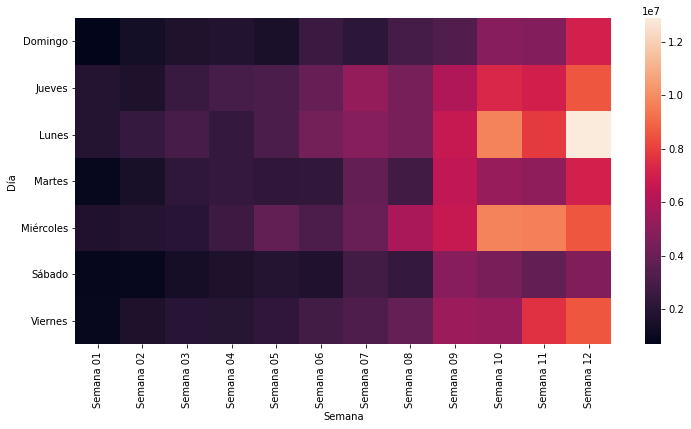

In [121]:
ax = sns.heatmap(df_pivoteado)

<AxesSubplot:xlabel='Semana', ylabel='Día'>

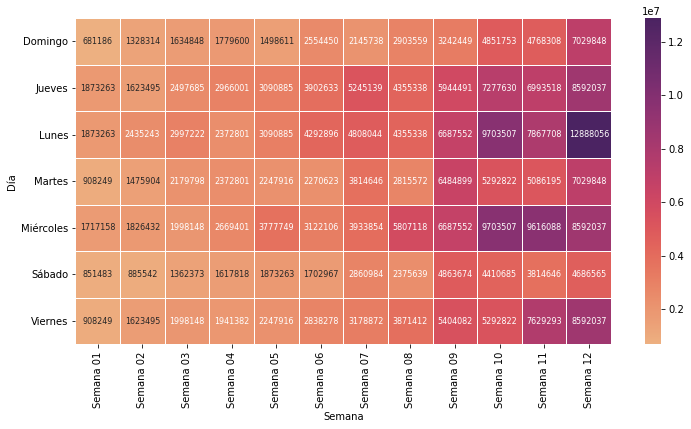

In [122]:
sns.heatmap(
    df_pivoteado,
    annot=True,
    fmt="d",
    annot_kws={'size': 8},
    cmap='flare',
    linewidths=.5,    
    )

<AxesSubplot:xlabel='Semana', ylabel='Día'>

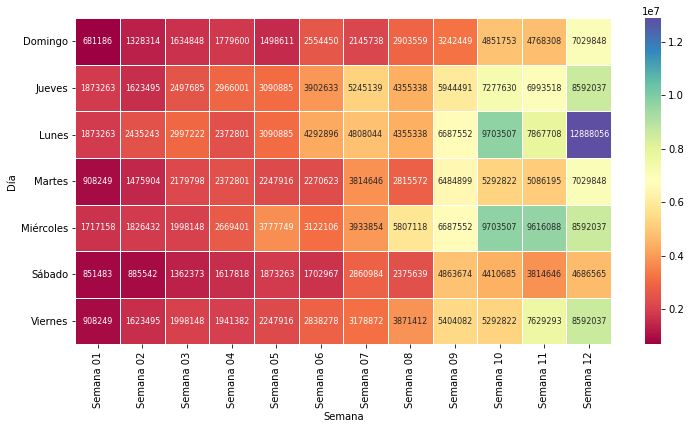

In [123]:
sns.heatmap(
    df_pivoteado,
    annot=True,
    fmt="d",
    annot_kws={'size': 8},
    cmap='Spectral',
    linewidths=.5,    
    )

## ¿Cuál paleta es más efectiva para codificar estos datos? 

En mi Opinión la secuencial se puede apreciar mejor los maximos y minimos con mas facilidad.

## CASO 2

In [124]:
df_titanic = sns.load_dataset("titanic") 

In [125]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [126]:
df_titanic_agrupado = df_titanic.groupby("class").size()


In [127]:
df_titanic_agrupado

class
First     216
Second    184
Third     491
dtype: int64

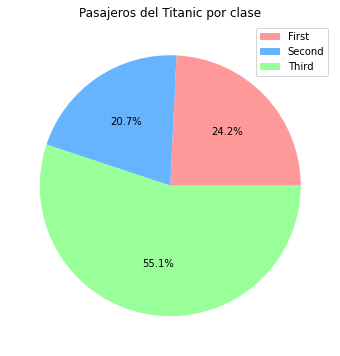

In [128]:
pie_chart = plt.pie(df_titanic_agrupado, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Pasajeros del Titanic por clase")
plt.legend(
    pie_chart[0],
    df_titanic_agrupado.index,
)
plt.show()

Text(0.5, 0.98, 'Pasajeros del Titanic por Supervivencia (0/1) y por Clase (T/F/S)')

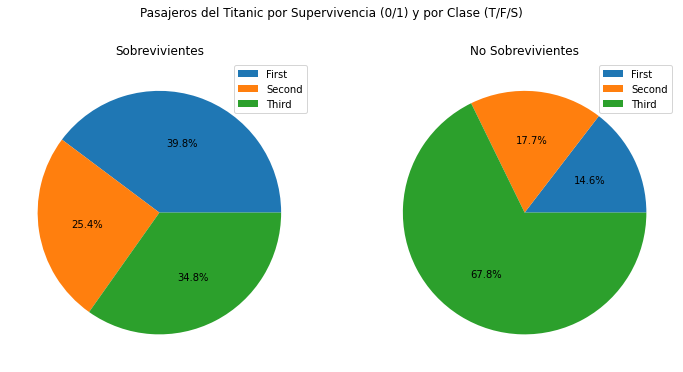

In [129]:
fig, charts = plt.subplots(1,2)

df_yes = df_titanic[df_titanic.alive == "yes"].groupby("class").size()
df_no = df_titanic[df_titanic.alive == "no"].groupby("class").size()

# Definimos cada gráfico
charts[0].pie(df_yes, autopct='%1.1f%%')
charts[1].pie(df_no, autopct='%1.1f%%')

charts[0].legend(
    df_yes.index,
)
charts[1].legend(
    df_no.index,
)
charts[0].set_title("Sobrevivientes")
charts[1].set_title("No Sobrevivientes")



fig.suptitle('Pasajeros del Titanic por Supervivencia (0/1) y por Clase (T/F/S)')

## a) de los supervivientes, ¿cuál es la clase de pasajero más común?

La primera clase (FIRST)

## b) de los no supervivientes ¿cuál es la clase de pasajero más común?

La tercera clase (THIRD)

## c) ¿cree que este gráfico es más efectivo que un gráfico de barras para comparar categorías? 

Depende, en este caso no habría gran cambio porque son pocas categorías y solo queremos ver el porcentaje(proporción). Para la proporción sirve este grafico pero si quisieramos ver la cantidad o comparar entre graficos o tuvieramos mas categorias sería preferible el de barras con ejes compartidos.

# CASO 3

In [132]:
df_peliculas = pd.read_csv("peliculas.csv")
df_peliculas.head()

,género,año,cantidad
0,acción,2010,11
1,acción,2011,14
2,acción,2012,22
3,acción,2013,11
4,acción,2014,12


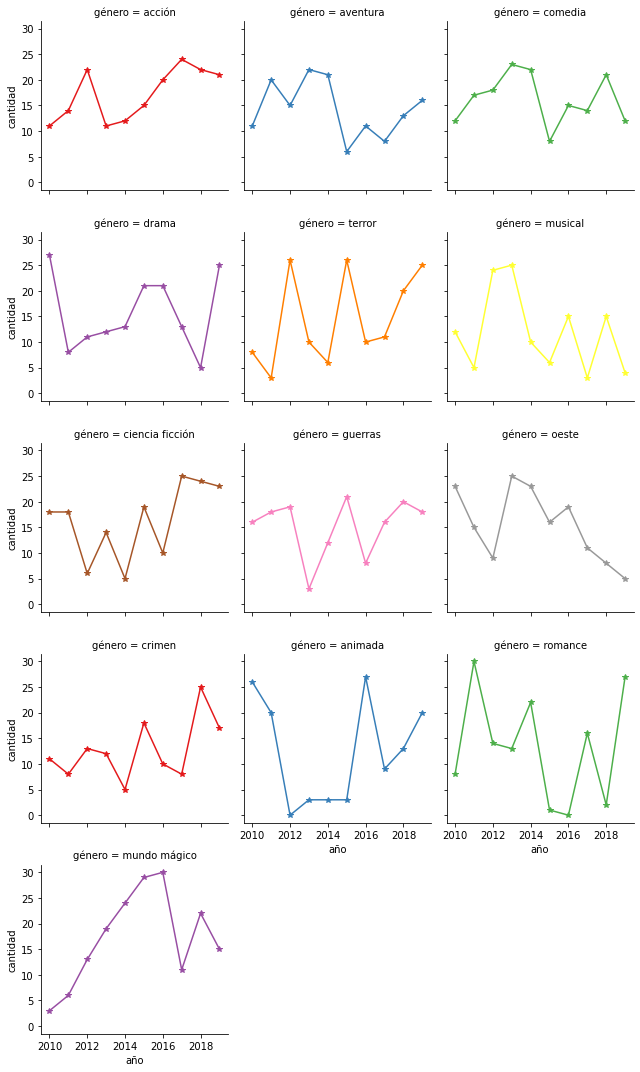

In [149]:
# Esta función solo genera los gráficos sin datos, ahora falta indicar con qué llenar cada gráfico
grid = sns.FacetGrid(
    data=df_peliculas,
    col="género",
    col_wrap=3,
    hue="género",
    palette='Set1'
)
grid.map(plt.plot, "año", "cantidad" , marker="*")



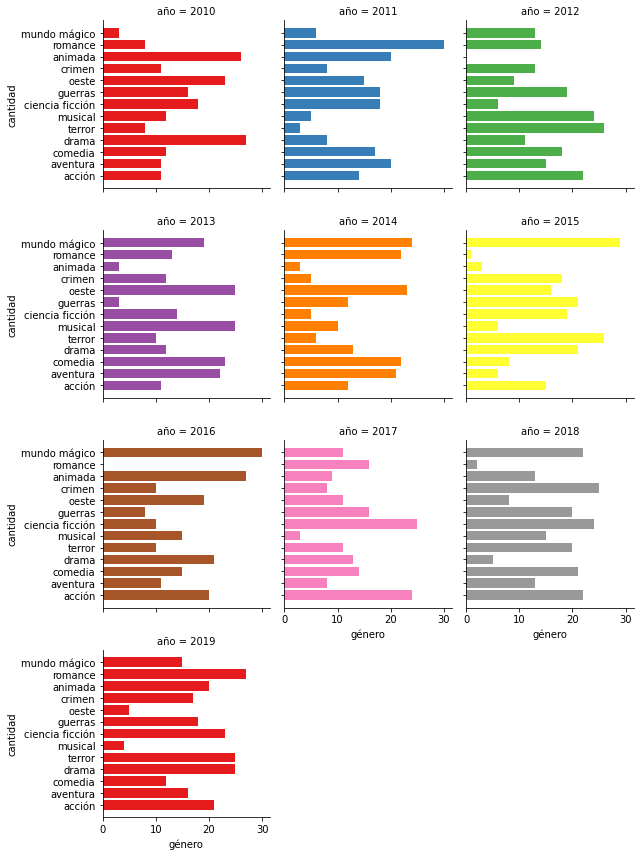

In [150]:
grid = sns.FacetGrid(
    data=df_peliculas,
    col="año",
    col_wrap=3,
    hue="año",
    palette='Set1'
)
grid.map(plt.barh, "género", "cantidad")

## ¿cuál de los dos gráficos permite comparar la tendencia de un género entre los diferentes años? 

El primero.

## ¿cual de los dos gráficos permite identificar el género de películas más estrenados en 1 año específico?   

El segundo.